In [25]:
# Importing necessary libraries  and Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv('heart.csv')

In [27]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [28]:
df.shape

(303, 14)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Descriptive statistical summary of numerical features
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# To find total_missing_values in different columns of data and their percentage
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(data= df)
missing_data

<function __main__.missing_data(data)>

In [9]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [10]:
# df['sex']=df['sex'].astype('object')
df['oldpeak']=df['oldpeak'].astype('int64')
df.dtypes

age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalach     int64
exang       int64
oldpeak     int64
slope       int64
ca          int64
thal        int64
target      int64
dtype: object

In [11]:
df['sex'] = df.sex.replace({1:'Male',0:'Female'})

# <h2>Data Visualization</h2><a id="4"></a>

C:\Users\adity\AppData\Local\Temp\ipykernel_1372\3701900094.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")


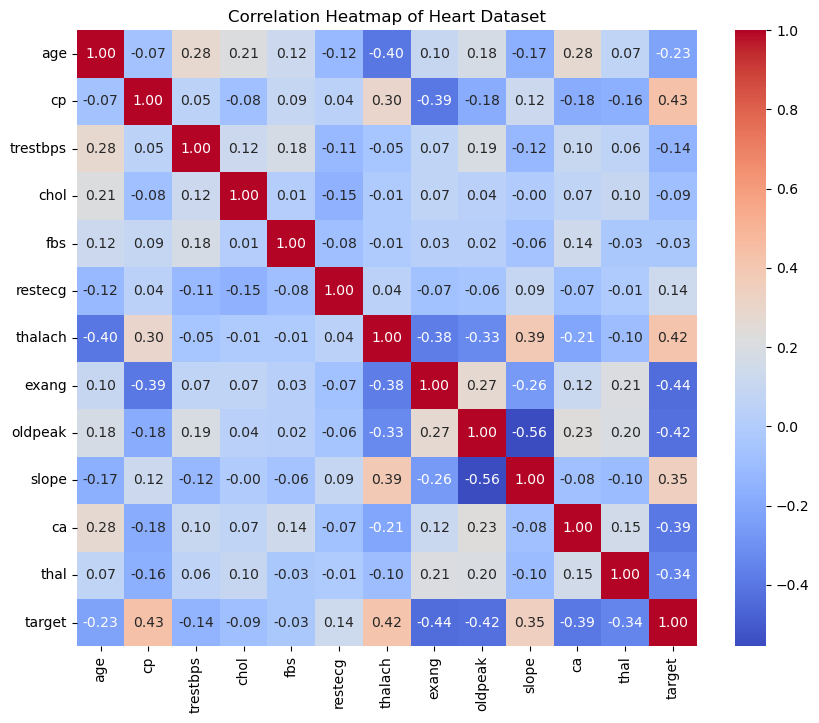

In [12]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Heart Dataset')
plt.show()

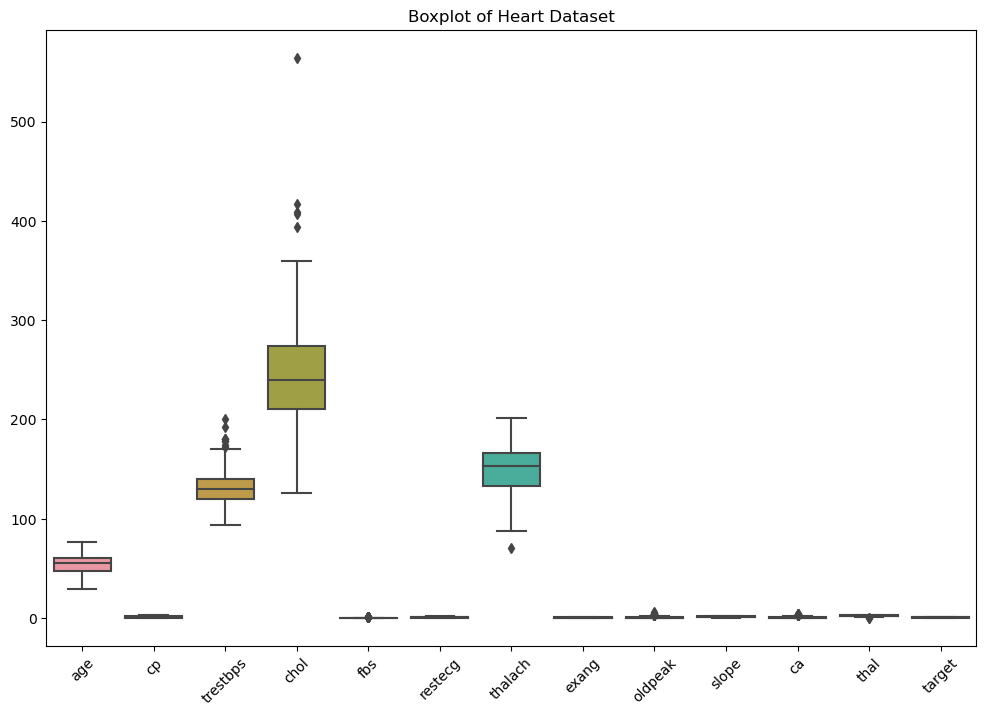

In [13]:
# Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Boxplot of Heart Dataset')
plt.xticks(rotation=45)
plt.show()

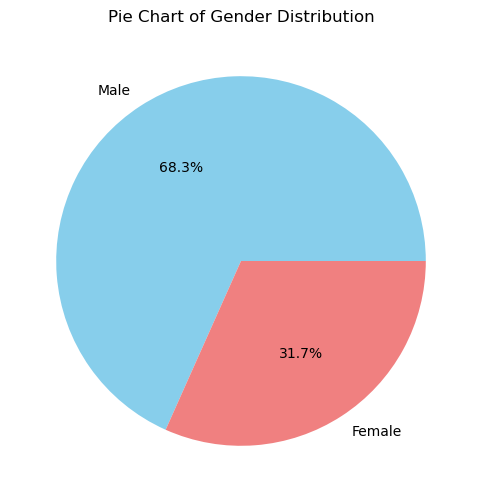

In [14]:
# Pie chart (for binary variable, like 'sex')
plt.figure(figsize=(8, 6))
df['sex'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Pie Chart of Gender Distribution')
plt.ylabel('')
plt.show()

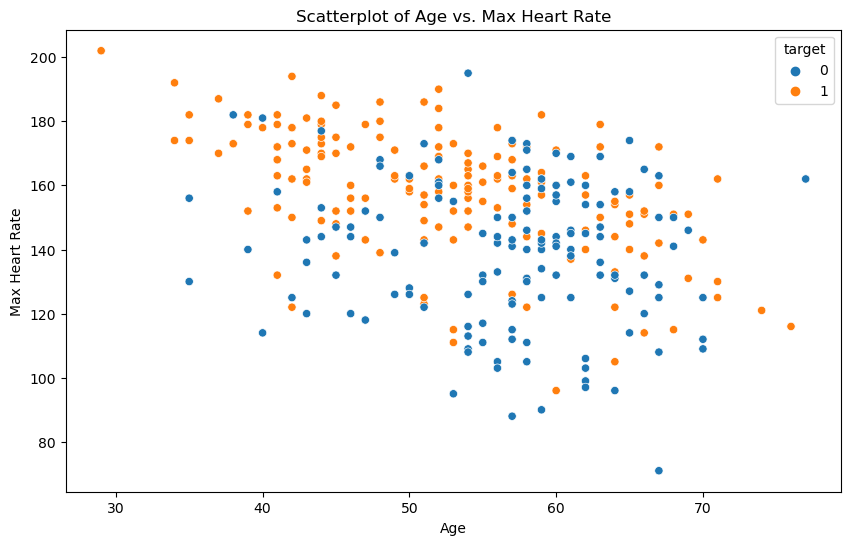

In [15]:
# Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', data=df, hue='target')
plt.title('Scatterplot of Age vs. Max Heart Rate')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.show()

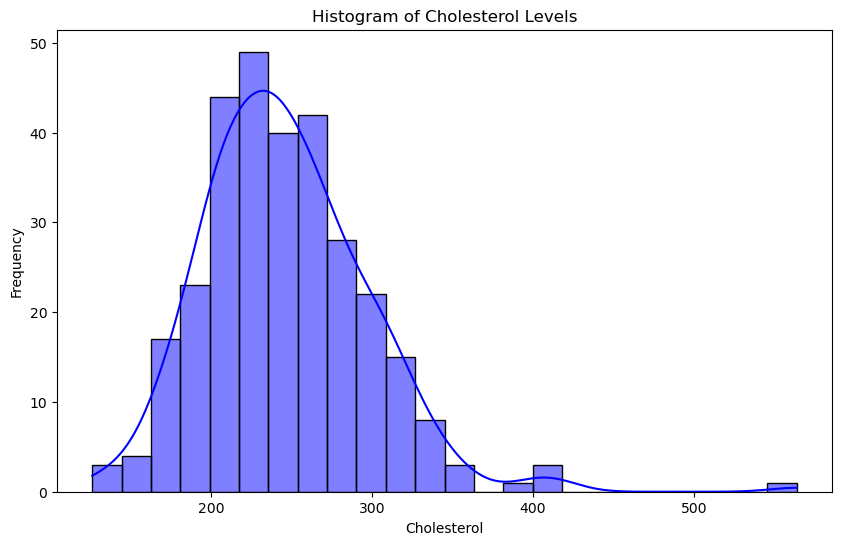

In [16]:

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='chol', kde=True, color='blue')
plt.title('Histogram of Cholesterol Levels')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

C:\Users\adity\AppData\Local\Temp\ipykernel_1372\339442150.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'], bins=20, kde=True, color='green')


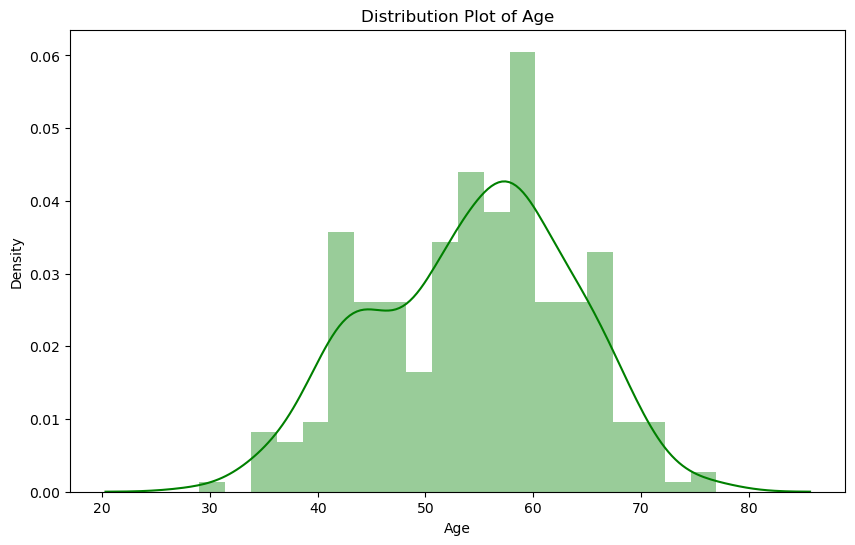

In [17]:
# Distplot
plt.figure(figsize=(10, 6))
sns.distplot(df['age'], bins=20, kde=True, color='green')
plt.title('Distribution Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

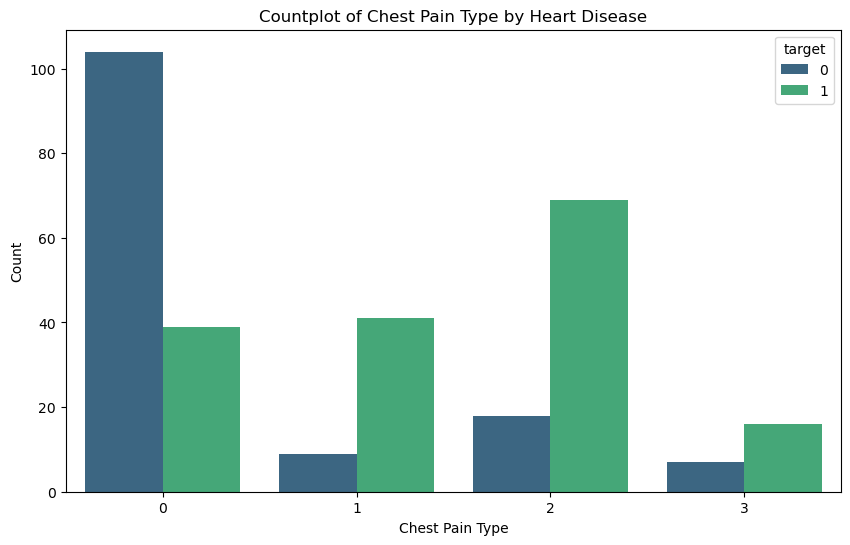

In [18]:
# Countplot (for categorical variables)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cp', hue='target', palette='viridis')
plt.title('Countplot of Chest Pain Type by Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

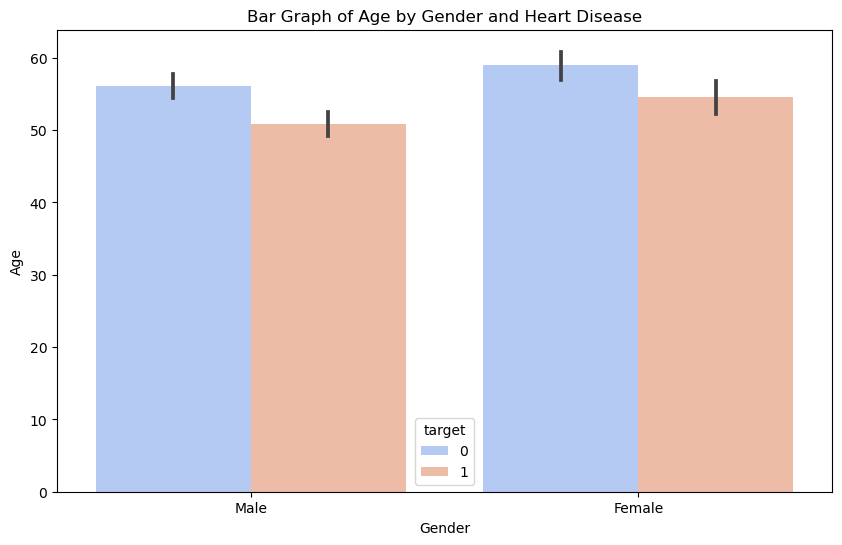

In [19]:
# Bar graph (for categorical variables)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='sex', y='age', hue='target', palette='coolwarm')
plt.title('Bar Graph of Age by Gender and Heart Disease')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()


In [20]:
young = df[(df['age'] >=29) & (df['age'] < 40)]
middle = df[(df['age'] >=40) & (df['age'] < 55)]
old = df[(df['age'] >=55)]

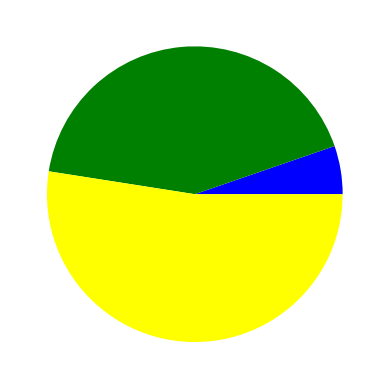

In [21]:
colors = ['blue','green','yellow']
plt.pie([len(young),len(middle),len(old)],colors=colors);

In [22]:
# Removing specific attributes from the DataFrame
final_df = df.copy()
extra = ['trestbps', 'chol', 'fbs', 'restecg','ca','exang','thal']
final_df.drop(labels=extra, axis=1, inplace=True)
final_df.head()


,age,sex,cp,thalach,oldpeak,slope,target
0,63,Male,3,150,2,0,1
1,37,Male,2,187,3,0,1
2,41,Female,1,172,1,2,1
3,56,Male,1,178,0,2,1
4,57,Female,0,163,0,2,1


<Figure size 1000x800 with 0 Axes>

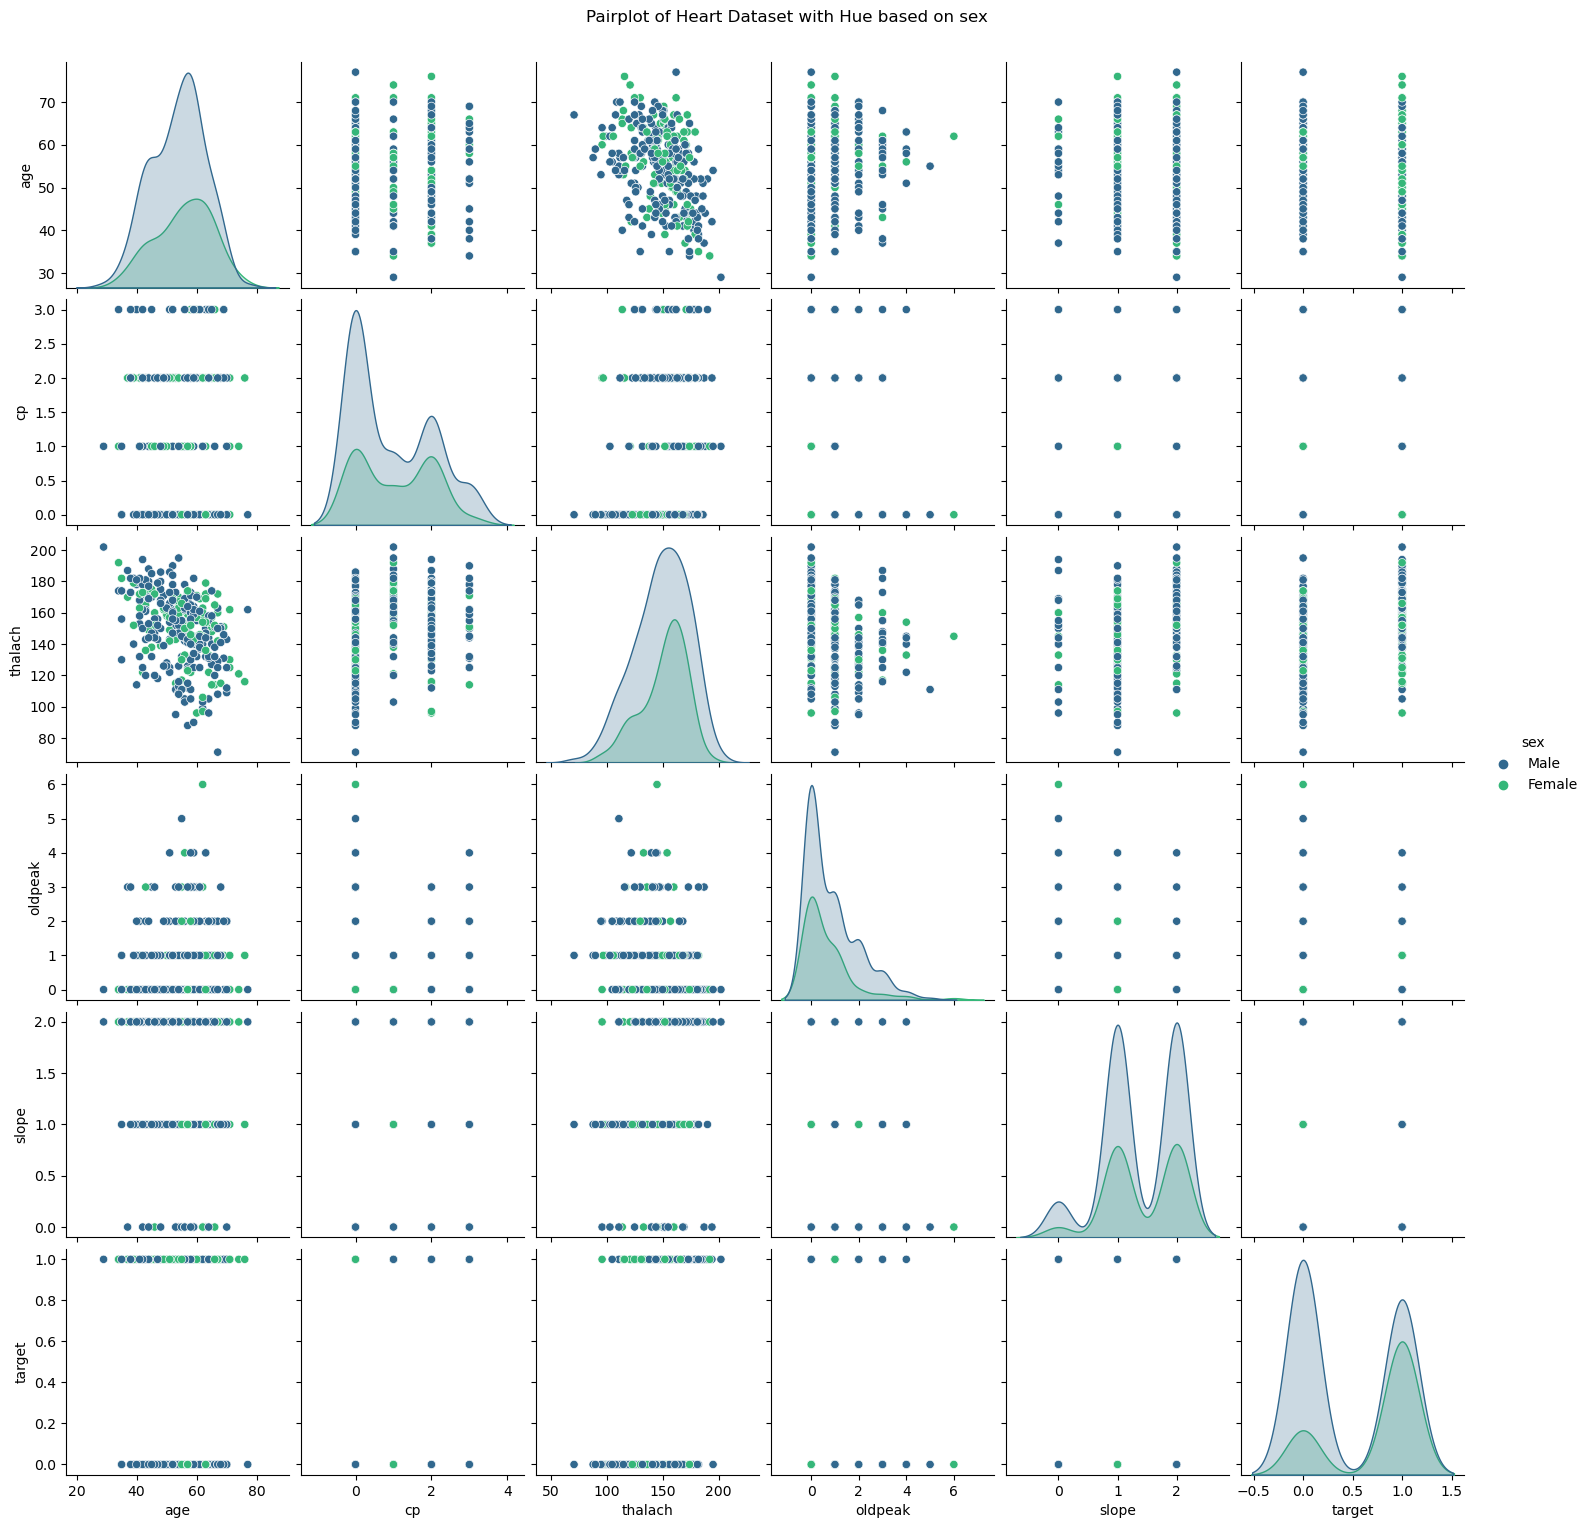

In [23]:
# Find the column with the minimum unique values
min_unique_column = final_df.nunique().idxmin()
plt.figure(figsize=(10, 8))
sns.pairplot(final_df, hue=min_unique_column, palette='viridis')
plt.suptitle(f'Pairplot of Heart Dataset with Hue based on {min_unique_column}', y=1.02)
plt.show()
